# Introduction to Molecular Modelling - Workshop 3

[Dr. Kim Jelfs](mailto:k.jelfs@imperial.ac.uk) and [Dr. João Pedro Malhado](mailto:malhado@imperial.ac.uk), Department of Chemistry, Imperial College London

If text is in <font color="#3399ff">blue</font>, then there is a question related to that text in the Blackboard Quiz for today's Workshop.

First we need to include libraries for plotting and numerical functions by executing:

    %pylab inline

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Empirical forcefields

### Introduction

Whilst in the next lab with Dr. Hunt you will be using Quantum Mechanics calculations, in this lab we have only been using "Forcefields". Names you will hear for simulations using forcefields include "Molecular Mechanics" or "Atomistic Simulations" (the latter as we don't consider the electronic wavefunction, just whole atoms). The advantage of molecular mechanics, is that because you are not explicitly considering the electrons, you are dramatically reducing the computational cost of the simulation, which means that we can consider much larger systems and can run much longer simulations (such as if we are running Molecular Dynamics simulations that look at how systems evolve over time). 

However, because forcefields have to be empirically fitted for systems, then you are reliant on:

1. A forcefield either being already available for a system you want to study or, otherwise, you will have to fit the forcefield yourself (this can be a pretty painful process, depending on the system).

2. The forcefield reproducing accurately the potential energy surface and features of a property you are interested in. You typically have to start many molecular mechanics studies by validating your forcefield for this reason.

3. *Transferability vs accuracy* - there is typically a pay-off between transferability (you fit a forcefield for a few systems, hope the forcefield parameters will be 'transferable' and work on other related systems) and accuracy.

The below table summarises the *typical* advantages and disadvantages of molecular mechanics compared to quantum mechanics simulations:

||Molecular Mechanics (MM)| Quantum Mechanics (QM)|
|--|-------------------------------|
|Computational cost (<100 atom system)|seconds on home Desktop| minutes-days, depends on accuracy level and no. of computer cores|
|Simulation time scales accessible| >nanoseconds| ~picoseconds|
|Can describe bond breaking/formation?|no|yes|
|Can describe properties that depend upon electronic distribution? |no |yes |
|Accuracy |variable, can be as good as QM| typically better, but dependent upon level of theory|
|Can be used as a "black box"? | no (forcefield validity?) | no (appropriate theory level?) |
|Transferable? | depends | not always, but better|

### A simple molecular mechanics forcefield

One other advantage of molecular mechanics is that it is a much simpler approach and therefore not only is it much computationally cheaper, it is also much simpler for us to understand too! Molecular mechanics makes use of Newtonian mechanics, not quantum mechanics. This means we are thinking of atoms and bonds as "balls and springs" and we therefore use simple functions to describe how the atoms interact (several of these you will be familiar with from Chemistry at school or the Physical Chemistry lectures this year).

One example functional form for such a forcefield is (from reference 1):

Potential energy = $\displaystyle\sum\limits_{bonds} \frac{k_{ij}}{2}(l_{i}-l_{i,0})^{2}$ + $\displaystyle\sum\limits_{angles} \frac{k_{ijk}}{2}(\theta_{i}-\theta_{i,0})^{2}$ + $\displaystyle\sum\limits_{torsions} \frac{V_{n}}{2}(1+cos(n\omega-\gamma))$ + $\displaystyle\sum\limits_{i=1}^{N}\displaystyle\sum\limits_{j=i+1}^{N}\Big( 4\epsilon_{ij}\Big[\Big(\frac{\sigma_{ij}}{r_{ij}}\Big)^{12}- \Big(\frac{\sigma_{ij}}{r_{ij}}\Big)^{6}\Big]$ + $\frac{q_{i}q_{j}}{4\pi\epsilon_{0}r_{ij}}\Big)$

The total potential energy for the system is calculated as the sum of all the other terms for all atoms. The first three terms are for **intra**tomic interactions (i.e. between atoms that are bonded) and are summed over all bonds, angles and torsions in a system. The remaining terms are for non-bonded (**inter**atomic) interactions and are summed over every single pair of atoms in a system, this includes van der Waals interactions and electrostatic interactions.

<img src="Workshop3_data/Image_files/FF_interactions.png" style="max-width:100%; width: 70%"/>

The constants and variables are:

* $N$ is the number of atoms in the system

* $k_{ij}$ is a force constant for a bond stretch between atoms with atom indices $i$ and $j$

* $k_{ijk}$ is a force constant for an angle bend between atoms with atom indices $i$, $j$ and $k$

* $l$ is a bond length (variable)

* $l_{0}$ is the equilibrium bond length

* $\theta$ is a bond angle (variable)

* $\theta_{0}$ is the equilibrium bond angle

* $V_{n}$ is a value that relates to relative barriers to rotation

* $n$ is the 'multiplicity' - it gives the number of minimum points you will have in a torsion energy plot

* $\omega$ is the torsional angle (variable)

* $\gamma$ is the phase factor

* $\epsilon_{ij}$ is the well depth in a Lennard-Jones non-bonded interaction

* $\sigma$ is the 'collision diameter', the separation between 2 non-bonded atoms that has energy=0.

* $q_{i}$ and $q_{j}$ are the partial charges on atoms $i$ and $j$.

* $\epsilon_{zero}$ is the electric permittivity

* $r_{ij}$ is the distance between two non-bonded atoms *i* and *j* (variable)
    

Let's now look at the individual terms:

* **Bond stretching term** - the functional form here is based on Hooke's law, a simple harmonic oscillator. As you have covered in your Physical Chemistry lectures, and in the Inorganic Spectroscopy lectures, this is in fact a poor description of a bond for larger bond distances. However, as bonds are not deviating from their equilibrium values in most molecular mechanics simulations, they still commonly use the Hooke's law formula - it is also more efficient as it requires fewer parameters (only 2; $k_{ij}$ and $l_{0}$) compared to other forms such as the Morse potential (3 parameters).

### Exercise 8: 
Below are the commands required to plot the simple harmonic oscillator function for a C-C bond between two sp<sup>3</sup> carbons (with force constant 317 kcal mol<sup>-1</sup> &Aring;<sup>-1</sup> and equilibrium bond length is 1.523 &Aring;). Execute this command in the below cell.

Then, add in another simple harmonic oscillator function to show what the bond stretching potential looks like for a C=C bond between two sp<sup>2</sup> carbons. The force constant for the C=C bonds is 690 kcal mol<sup>-1</sup> &Aring;<sup>-1</sup> and the equilibrium bond length is 1.337 &Aring; (values from [*J. Am. Chem. Soc.* 99, 8127, **1977**](http://dx.doi.org/10.1021/ja00467a001)).

    r = linspace(0, 10, 200)
    Hooke_Csp3 = (317/2)*(r-1.523)**2

    plot(r,Hooke_Csp3, label="Hooke's Law Csp3-Csp3")

    xlabel('Bond distance (Angstrom)')
    ylabel('Energy (kcal/mol)')
    xlim(0, 6.0)
    ylim(0, 200)

    legend(loc='upper right')

    show()

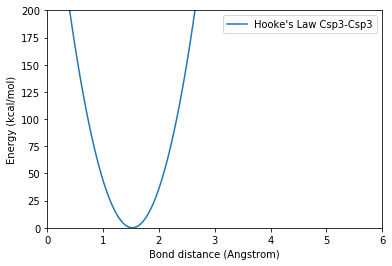

In [5]:
r = linspace(0, 10, 200)
Hooke_Csp3 = (317/2)*(r-1.523)**2

plot(r,Hooke_Csp3, label="Hooke's Law Csp3-Csp3")

xlabel('Bond distance (Angstrom)')
ylabel('Energy (kcal/mol)')
xlim(0, 6.0)
ylim(0, 200)

legend(loc='upper right')

show()

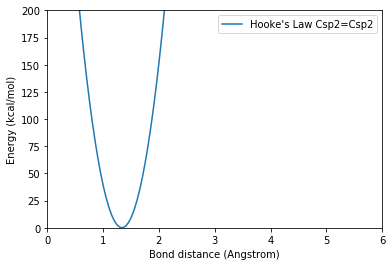

In [4]:
r = linspace(0, 10, 200)
Hooke_Csp3 = (690/2)*(r-1.337)**2

plot(r,Hooke_Csp3, label="Hooke's Law Csp2=Csp2")

xlabel('Bond distance (Angstrom)')
ylabel('Energy (kcal/mol)')
xlim(0, 6.0)
ylim(0, 200)

legend(loc='upper right')

show()

* **Angle bending term** - this is based on the same functional form as the bond stretching term.

    <font color="#3399ff"> Now answer the questions on bond stretching and angle bending in the Quiz.</font>



* **Torsional term** - these terms involve much smaller changes in potential energy compared to the bond stretching and angle bending terms. This means it is much easier for a molecule to vary its structure through changes in torsional energy and the non-bonded terms we will discuss next, so most of the variation in a molecule's structure will typically involve the variation in these features.

    Let's think of the number of terms we would have for a simple organic molecule, cyclohexane - the energy profile for interconversions of conformers of which you have discussed in Dr. David Mountford's lecture last term:
       
    * C-C-C-C (there are 6 of these torsions)
    * C-C-C-H (there are 24 of these torsions)
    * H-C-C-H (there are 24 of these torsions)
    
    So we have a total of 54 torsions in this relatively small molecule, but we can describe these with just 3 different parameter sets (one for C-C-C-C, one for C-C-C-H and one for H-C-C-H). Just as with the other terms, the functional form used will vary across different forcefields, but it is almost always a cosine series expansion.
    
    $\displaystyle\sum\limits_{torsions} \frac{V_{n}}{2}(1+cos(n\omega-\gamma))$ 
    
    Whilst $V_{n}$ relates to relative barriers to rotation about a central bond (larger $V_{n}$ $\rightarrow$ larger barrier), of course you must remember that the non-bonded interactions (i.e. how atoms 1 and 4 interact in a torsion 1-2-3-4) will also influence this. $n$, known as the multiplicity, gives the number of minimum points in the function for a complete rotation of 360$^{\circ}$. $\gamma$, known as the phase factor, determines where the torsional angle passes through its minimum. The below plot shows an example of the torsional terms for rotation about two different bonds:
    
    <img src="Workshop3_data/Image_files/torsion_plot.png" style="max-width:100%; width: 45%"/>
    
    <font color="#3399ff"> Which, if any, of these forms is for rotation about a C-C bond, C=C bond or C&equiv;C bond?</font>

### Exercise 9:
    
Sometimes, you will use a summation of cosine terms to describe the torsional energy, for example, the forcefield AMBER uses two terms to reproduce the tendency for O-C-C-O bonds in the sugars of DNA to adopt a *gauche* conformation (reference 1):
    
Torsion energy (O-C-C-O) = 0.25(1+cos(3&omega;))+0.25(1+cos(2&omega;)) 

Use the cell below to plot this function and see how it results in a preference for a *gauche* conformation (**Hint**: Python notebooks are assuming angles are in radians; &pi; is known as "pi" in Python).     

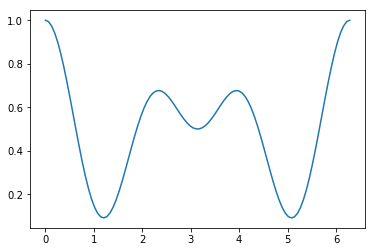

In [9]:
ω=linspace(0,2*pi,100)
Torsion_energy=0.25*(1+cos(3*ω))+0.25*(1+cos(2*ω)) 
plot(ω, Torsion_energy, marker='', linestyle='-')
show()

<font color="#3399ff"> Now answer the questions in the Quiz about the intramolecular interactions for propane.</font>

* **van der Waals interactions** - these include the short-range repulsion and long-range attraction (dispersive) interactions, again simple functional terms are used to describe them. The simplest is a Lennard-Jones functional - you will have seen this in your Physical Chemistry lectures, commonly this is used in 12-6 form, with these interactions summed over every pair of atoms:

    $\displaystyle\sum\limits_{i=1}^{N}\displaystyle\sum\limits_{j=i+1}^{N}
    4\epsilon_{ij}\Big[\Big(\frac{\sigma_{ij}}{r_{ij}}\Big)^{12}- \Big(\frac{\sigma_{ij}}{r_{ij}}\Big)^{6}\Big]$

    where $\epsilon_{ij}$ is the well depth and $\sigma_{ij}$ is the 'collision diameter', the separation between 2 non-bonded atoms that has zero potential energy.

### Exercise 10:

Use the below syntax to plot the van der Waals interactions (you will need to fill in the van der Waals equation yourself). Have a play around with changing the sigma and epsilon values using the interact function in the notebook (you encountered this in Workshop 4 of the Python for Data Analysis workshop). This should allow you to see how these parameters relate to the well depth and 'collision diameter' of the interaction between 2 atoms that are not directly bonded to each other.

    from IPython.html.widgets import interact

    @interact(epsilon=[0,10,1.1],sigma=[0,10,0.1])
    def interact_sigma_e(epsilon,sigma):
        dist = linspace(0.1,10,200)
        LJ_12_6 = ENTER_THE_VAN_DER_WAALS_INTERACTION_FUNCTION_HERE
        plot(dist,LJ_12_6,color="darkred")

        xlabel('Separation of atoms')
        ylabel('VdW energy')
        xlim(0, 10)
        ylim(-10, 3)

        show()

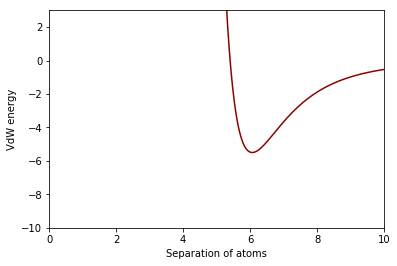

In [3]:
from IPython.html.widgets import interact

@interact(epsilon=[0,10,1.1],sigma=[0,10,0.1])
def interact_sigma_e(epsilon,sigma):
    dist = linspace(0.1,10,200)
    LJ_12_6 = 4*epsilon*((sigma/dist)**12-(sigma/dist)**6)
    plot(dist,LJ_12_6,color="darkred")

    xlabel('Separation of atoms')
    ylabel('VdW energy')
    xlim(0, 10)
    ylim(-10, 3)

    show()

* **Electrostatic interactions** - these are calculated using Coloumb's law (below), with the interactions assumed to be between every pair of point charges. For the simplest description of the electrostatic interactions, each atom has a single point charge - these can be calculated via a number of different algorithms, for instance dependent upon element type and bond connectivity, or can be determined from quantum mechanical simulations.

    $\displaystyle\sum\limits_{i=1}^{N}\displaystyle\sum\limits_{j=i+1}^{N} \frac{q_{i}q_{j}}{4\pi\epsilon_{0}r_{ij}}$


## Exploring potential energy surfaces

The total potential energy for a system is calculated as the sum of all the terms we have just looked at. Therefore, you can hopefully see that the potential energy surface even for molecules with only a few atoms quickly gets very complicated (even if the simple functional forms mean it is very cheap to calculate for a computer). In fact, a system of $N$ atoms actually has 3$N$ cartesian coordinates (each atom has 3 coordinates, $x$, $y$ and $z$) - therefore the *potential energy surface* is in 3$N$ dimensional space. Naturally, we can not therefore visualise this space and, furthermore, we can not just solve, analytically, where the global minimum for that system is. A lot of computational chemistry is about methods to explore this potential energy surface, depending on our investigation we might be looking for maxima on the surface (transition states) or local or global minima or a representative ensemble *etc.*

What you've been using so far in these workshops is the "Auto-Opt" function in Avogadro. What you are doing here are optimisations (as computational chemists, we might call this all sorts of terms e.g. an "energy minimisation" or "minimisation", a "geometry optimisation", a "structural relaxation"). What is happening here is that the derivatives of the energy are being calculated (these are the forces on the atoms) and then algorithms are used that try to reach a minimum (where the second derivative is zero). There are many different algorithms for this, which vary in their effectiviness, computational cost and speed. One of the main differences is whether or not the second derivatives of the potential energy are calculated - in the default algorithms you have been using in Avogadro, they are not (see references 1-3 if you're interested in knowing more about them). You will also explore more about geometry optimisations and how to confirm you are in a true minimum in the Computational Labs with Dr. Hunt.

Of course, as we mentioned in the last workshop when we discussed the below simple potential energy landscape, there is therefore **no guarantee, or even great likelihood** that we will find the global minimum conformation for a molecule from an arbitrary starting point with a minimisation (such as a structure you have constructed in ChemDraw or Avogadro). In the example surface shown below, if you start in point A, a minimimisation will take you to the local minimum, 1, (or close to it), it will never take you to the global minimum, 2, as that would require going uphill in energy. Similarly, if you start at point B you will only minimise to the global minimum, 2. If you start in point C, then, from the information below it is not clear which minimum you will end up in, indeed, this might depend on the minimisation algorithm you use.

Whilst you have always been manually manipulating the structures to explore the potential energy landscapes, there are of course many, many more sophisticated computational approaches that have been developed to do this (e.g. Molecular Dynamics, Monte Carlo approaches and more). But we don't have time to try these in this lab!

<img src="Workshop3_data/Image_files/PES_explan_2.png" style="max-width:100%; width: 80%"/>

### Exercise 11: Exploring the potential energy surface of cyclohexane

Open up Avogadro and draw a cyclohexane molecule. Below is the energy profile for interconversion between cyclohexane conformations (taken from Dr. Mountford's lectures), based on this profile, <font color="#3399ff"> how many symmetrically distinct minima for cyclohexane do you expect to find in Avogadro?</font>

<img src="Workshop3_data/Image_files/cyclohexane_confs_DMlect2.png" style="max-width:100%; width: 40%"/>

Then, combining auto-optimise with your manual manipulation of atoms, calculate the *minimised* energy (using the MMFF94s forcefield) of each of the conformations of cyclohexane that correspond to a minimum. Save as a **.xyz** file each of your conformations in "Structures_built_in_lab" folder. In the box below note the name and energy of each of these conformers. Do their relative energies make sense?

Now we are going to look for all the systems in the CSD that have a cyclohexane within the structure. Not only is this database an amazing resource for finding specific crystal structures (as we did yesterday), we can also analyse the database for trends - what we are going to look at now is the distribution of torsion angles in every structure containing cyclohexane in the CSD.

* Open up Conquest and draw a cyclohexane molecule as a build query (**Hint:** remember to add in the hydrogens). Before you submit the search, click "Add 3D" and select 4 carbon atoms in a row to select a torsion - this torsion should be highlighted in green. 

* A pop-up window of "Geometric Parameters" will have opened, in the 'Valid Parameters' section, click on the 'Define' button next to where it says 'Torsion'. This should add a "TOR1" (i.e. "torsion 1") to the "3D parameters" box on the right - it will be shown in green. You can then click 'Done' and 'Start Search'. 

* There should be several hundred hits, in the top corner of each you can see the value of the parameter for each structure (if you click on them in turn). 

* Now click "Analyse Hitlist", "Analyse Data" and then make sure the "Include Defined Parameters" box is ticked, before clicking "Analyse in Mercury".

* This will open up Mercury and several other windows. In the window called "Hit fragment display options", click "Data Analysis...". This opens up a spreadsheet, where you see the torsion for each of the structures. 

* Select the header of the column of torsions, click "Plots" at the top and then choose the options to get the plot.

* You should now have a histogram plot that shows the C-C-C-C torsions found for all cyclohexane structures in the CSD. 

* <font color="#3399ff"> What are the angles of the main peaks in the histogram</font>, do these make sense? - the Newman projection for cyclohexane with all torsions in *staggered* conformation is shown below, this might help you think about expected torsional angles.

<img src="Workshop3_data/Image_files/cyclohexane_newman.png" style="max-width:100%; width: 20%"/>

* Go back to the spreadsheet and click on some rows of structures that have very unexpected torsional angles. <font color="#3399ff"> What are the main features of the structures with unexpected torsion angles for cyclohexane?</font>

* Now repeat the above search for C-C-C-C torsions in the CSD, but for *benzene*. **CAUTION**: when you do the search, you should click "Stop Search" once you have more than 1000 hits - if you get all the hits it will be too much for the computer's memory to analyse. The new distribution should make sense to you. Write in the box below the mode of the distribution of C-C-C-C torsional angles in benzene:



-4 degrees 

### Exercise 12 - Exploring the potential energy surface of 1,3-dimethylcyclohexane

Here is another slide from your lectures with Dr. Mountford, about the stereoisomers of 1,3-dimethylcyclohexane:

<img src="Workshop3_data/Image_files/1_3_dimethylcyclohexane.png" style="max-width:100%; width: 40%"/>

Build both a *trans* and *cis* model of the molecule, save each as a **.xyz** file in the "Structures_built_in_lab" folder. Report below the calculated energies of the minimised structures using the MMFF94s forcefield. Also measure the distance between the carbon atoms of the methyl groups. <font color="#3399ff">What is the relative energy between these isomers?</font>

Now search for this system in the CSD, asking to analyse the distance between the carbons of the methyl groups (so you can compare to your calculations above). <font color="#3399ff">How many structures do you find?</font>

### Exercise 13 - Is *cis* or *trans*-decalins the lower energy conformation?

This molecule was one of the first ever studied with molecular mechanics - in 1948 by Nobel prize winner Barton, then at Imperial College ([*J. Chem. Soc.* 340 **1948**](http://dx.doi.org/10.1039/JR9480000340)). He spent many months with a hand-cranked calculator ([click here to see what one looks like](https://en.wikipedia.org/wiki/Curta)) to work out which decalins configurational isomer was lowest energy. You can now do these in a few seconds on your desktop computer!  

This image shows the *cis*-decalins molecule:
<img src="Workshop3_data/Image_files/cis_decalins.png" style="max-width:100%; width: 15%"/>

Now build and save a model of both the low energy *cis* and *trans*-decalins configurational isomers, using the forcefield MMFF94s. **Hint**: the low energy isomers for both *cis* and *trans* have both cyclohexanes in 'chair' conformation. **CAUTION**: Beware there are other isomers beyond these two, which you might find if you do not make sure the cyclohexanes are in 'chair' conformation. The *cis* isomer has the two *cis*-hydrogens in a *staggered* conformation. 

Save each of your models. Report their energies in the box below (with appropriate names).

trans-decalin E=26.2119
cis-decalin E=61.0438

<font color="#3399ff">What is the relative energy between your *cis* and *trans*-decalins and which is more stable?</font>

**Optional**: save an image of each of the conformations and load them into your notebook below:

### Exercise 14 - nickel(II) phosphine complexes

In the last workshop you built a model of one of the transition state complexes that you will be lectured on in Term 3 by Dr. James Wilton-Ely, will synthesise in Term 3 labs and will do further quantum mechanical simulations on with Dr. Hunt in computational labs next year.

We mentioned that one question in your lab this year will be whether the nickel(II) phosphine complex you synthesise is *cis*-square planar, *trans*-square planar or tetrahedral; you will be using spectroscopic techniques to distinguish them. We're going to look here at [NiCl<sub>2</sub>(PPh<sub>3</sub>)<sub>2</sub>] in particular (which you tried to build a model of in Avogadro last time). We are going to investigate in the CSD which of these geometries are frequently observed.

Open up ConQuest and draw the structure of [NiCl<sub>2</sub>(PPh<sub>3</sub>)<sub>2</sub>]. **Hint**: When you are drawing the structure in ConQuest, unless you specify stereochemistry, then it assumes nothing - so even if you draw a *trans*-isomer, because you have actually only defined the connectivity of the molecule, the search will find *cis*-isomers and also both square-planar and tetrahedral geometries - which is what we want!

Now, think of some parameter (bond length, bond angle, torsion, intermolecular distance) that you can use to distinguish between the different geometries of *cis*-square planar, *trans*-square planar or tetrahedral. Now use that in your analysis of your search and do the search. Then analyse the data and also look at each of the structures you have in Mercury, working out which refcode family belongs to which type of geometry. Are all the geometries represented in the CSD? Answer the questions in the boxes below and in the <font color="#3399ff">Quiz</font>.

Give a refcode for a complex with each of the following geometries or answer "none" if no complexes with that geometry were found:

*trans*-square planar: DUKHEW, PEKNIC, PEKNIC01

*cis*-square planar: none

tetrahedral: CLTPNI, CLTPNI01, CLTPNI02, CLTPNI03, CLTPNI04

What parameter did you use to distinguish between the complexes' geometries? bond angle

Do you see anything unexpected about the angles for the bonds around the Ni? no

### More information:

* Avogadro tutorials: http://avogadro.cc/wiki/Category:Tutorials

* Mercury tutorials/user guide: [https://www.ccdc.cam.ac.uk/support-and-resources](https://www.ccdc.cam.ac.uk/support-and-resources/CCDCResources/?rt=-1&mc=-1&p=0e7591ad-2201-e411-99f5-00505686f06e&so=0)

* Books with good information on Molecular Modelling for beginners:
    1. Molecular Modelling: Principles and Applications, A. R. Leach, 2nd Edition, Pearson.
    2. Understanding Molecular Simulation, D. Frenkel & B. Smit, 2nd Edition, Academic Press.
    3. Essentials of Computational Chemistry, C. J. Cramer, 2nd Edition, Wiley.

### Acknowledgments

Prof. Henry Rzepa for inspiration for the decalins exercise.

### <font color="red">IMPORTANT</font>

Now submit **ALL** the files you've saved and this completed and saved notebook onto Blackboard as a **single zip file**. 

To do this, navigate to the files in Windows Explorer, highlight the notebook and all the folders that contain the files you've saved. Then right-click, point to 'Send to', and then click 'Compressed (zipped) folder'. This should create a zip file in the same location. Upload this zip file to Blackboard. 

<font color="red">*Note*</font>: When marking last year, we found many people only uploaded the notebook and not all the files they'd created as well. Double-check you have uploaded all the files as a single zip file - you could check this by redownloading the zip file from Blackboard and opening it to check. If you're still not sure, check with a demonstrator. We will expect the files you've created *as well as* the notebook when we check your uploads.